In [1]:
import os
import numpy as np
from pandas import read_csv

## Section 1: Plotting

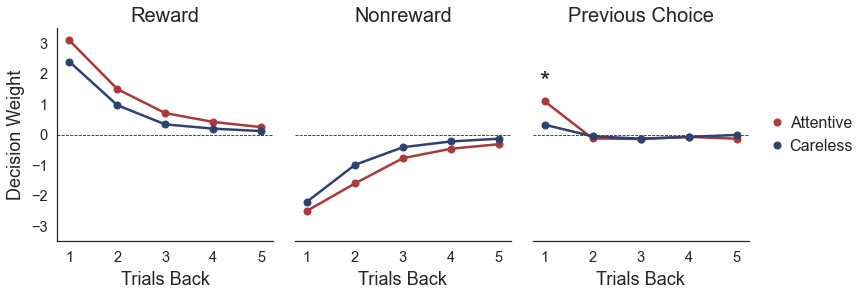

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_theme('notebook', style='white', font='sans-serif', font_scale=1.33)
%matplotlib inline

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load and prepare data.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Load StanFit summary.
f = os.path.join('stan_results','softmax_regression_summary.tsv')
contrasts = read_csv(f, sep='\t', index_col='name')

## Restrict to contrast parameters.
contrasts = contrasts.T.filter(regex='contrasts')

## Extract averages and bounds.
mu = contrasts.loc['Mean'].values.reshape(3,5,3)
lb = contrasts.loc['5%'].values.reshape(3,5,3)
ub = contrasts.loc['95%'].values.reshape(3,5,3)

## Assess credible intervals. 
credible = np.where(np.sign(ub) - np.sign(lb), 0, 1)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define canvas.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig = plt.figure(figsize=(12,4))

## Initialize grid.
gs = fig.add_gridspec(nrows=1, ncols=3, left=0.07, right=0.87, top=0.90, bottom=0.16, wspace=0.1)

## Define aesthetic features.
titles = ['Reward', 'Nonreward','Previous Choice']
palette = ['#AA3939','#2E4272']
labelpad = 6

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define x-axis.
x = np.arange(5) + 1

for i in range(3):

    ## Initialize axis.
    ax = plt.subplot(gs[i])

    ## Plot regression weights.
    for j, label in enumerate(['Attentive','Careless']): 
        ax.plot(x, mu[i,:,j], '-o', color=palette[j], lw=2.5, markersize=7, label=label)

    ## Denote credible difference.
    for k in np.where(credible[i,:,2])[0]:
        ax.annotate('*', (1,1), (k+1,mu[i,k,:2].max()+0.6), xycoords='data',
                    ha='center', va='center', fontsize=26)
    
    ## Add labels.
    ax.axhline(0, color='k', lw=0.8, linestyle='--', zorder=-1)
    ax.set(xlim=(0.75,5.25), xticks=x, ylim=(-3.5,3.5), yticks=[])
    ax.set_xlabel('Trials Back', fontsize=18, labelpad=labelpad)
    ax.set_title(titles[i], fontsize=20)
    if not i:
        ax.set_yticks(np.arange(-3,4)); 
        ax.set_ylabel('Decision Weight', fontsize=18, labelpad=labelpad)

    ## Set spines.
    sns.despine(left=bool(i), right=True, top=True, ax=ax)
    
## Add legend.
ax.legend(loc=7, bbox_to_anchor=(1.55,0.5), frameon=False, fontsize=16, handlelength=0)
    
## Save figure.
plt.savefig(os.path.join('..','figures','main_03c.png'), dpi=180, transparent=True)